# Simulating the Schrodinger Equation

---

### Math Background

#### The Schrodinger Equation

From quantum mechanics we know that the time evolution of a quantum state $|\psi\rangle$ is governed by the Schrodinger Equation.

$$\hat{H}|\psi\rangle = i\hbar\frac{d}{dt}|\psi\rangle$$

Where $\hat{H}$ is the Hamiltonian Operator and is associated with the energy of the system. Classically we also know that the energy of a system is given by the sum of kinetic and potential energy.

$$E = H = \frac{p^2}{2m} + V$$

Focusing on a single particle system in one dimension of space gives a wavefunction that is represented by a complex-valued function over the x-axis, $\psi(t, x)$. Substituting the appropriate operators into the Schrodinger Equation gives the PDE describing the dynamics of this complex-valued function.

$$\left(-\frac{\hbar^2}{2m}\frac{\partial^2}{\partial x^2} + V(t, x)\right)\psi(t,x) = i\hbar\frac{\partial\psi}{\partial t}$$

Multiplying by $\frac{-i}{\hbar}$ and expanding gives an equation that will be more useful after discretization.

$$\frac{\partial\psi}{\partial t} = \frac{i\hbar}{2m}\frac{\partial^2\psi}{\partial x^2} - \frac{i}{\hbar}V(t,x)\psi(t,x)$$

#### Taylor Series

A Taylor-Series expansion can be used to predict the forward step of a function using the derivatives at the current point.

$$f(x+h) = f(x) + hf'(x) + \frac{h^2}{2}f''(x) + O(h^3)$$

Combining a few different forward steps allows us to get a finite difference approximation for $f''(x)$.

$$\frac{f(x+h) - 2f(x) + f(x-h)}{h^2} + O(h) = f''(x)$$ 

#### Discretizing Space

$$x \rightarrow x_j$$
$$x + \Delta x \rightarrow x_{j+1}$$
$$\psi(t,x) \rightarrow \psi_j(t)$$
$$\psi(t,x+\Delta x) \rightarrow \psi_{j+1}(t)$$

$$\frac{d\psi_j}{dt} = \frac{i\hbar}{2m}D^2\psi_j(t) - \frac{i}{\hbar}V(t,x_j)\psi_j(t)$$

$$D^2\psi_j = \frac{\psi_{j+1} - 2\psi_{j} + \psi_{j-1}}{(\Delta x)^2}$$

#### Time Step

### Examples

To use the `schrodinger.py` module, ensure that you have numpy and matplotlib installed. To interactively see the example animations with `%matplotlib widget`, you will need ipympl installed. A Pipfile has been included so that the command `pipenv sync -d` can be used to create an environment with all dependencies installed. `pipenv shell` spawns a shell within that environment. Make sure to stop every animation with 'q' before running another.

In [1]:
# Import the module and tell matplotlib we're using notebook widgets

from schrodinger import *
%matplotlib widget

In [ ]:
# Example 1: Diffusion

particle = Particle.from_initial(wave_packet, x_0=0, p_0=0, sigma_x=0.1) # compare sigma_x=0.05 to sigma_x=0.2
particle.animate(x_lim=(-2, 2), notebook=True)

In [ ]:
# Example 2: Travelling Particle

particle = Particle.from_initial(wave_packet, x_0=0, p_0=20, sigma_x=0.1)
particle.animate(x_lim=(-2, 2), notebook=True)

In [ ]:
# Example 3: Square Well

particle = Particle.from_initial(wave_packet, x_0=0, p_0=20, sigma_x=0.4)
particle.add_potential(barrier, 4, height=1000)
particle.add_potential(barrier, -4, height=1000)
particle.animate(x_lim=(-6, 6), notebook=True)

In [ ]:
# Example 3: Tunneling

particle = Particle.from_initial(wave_packet, x_0=0, p_0=20, sigma_x=0.1)
particle.add_potential(barrier, 1.5, height=300)
particle.animate(x_lim=(-4, 4), notebook=True)

In [ ]:
# Example 4: Simple Harmonic Oscillator

particle = Particle.from_initial(wave_packet, x_0=0, p_0=20, sigma_x=0.3) # compare p_0=20 and p_0=40
particle.add_potential(simple_harmonic)
particle.animate(x_lim=(-10, 10), notebook=True)

In [ ]:
# Example 5: Finite Square Well Damping To Ground State

particle = Particle.from_initial(wave_packet, x_0=0, p_0=0, sigma_x=0.4)
particle.add_potential(barrier, 2, height=20)
particle.add_potential(barrier, -2, height=20)
particle.animate(x_lim=(-3, 3), notebook=True, damp_eigen=True, v_scale=1)

In [ ]:
# Example 6: Finite Square Well First Excited State

particle = Particle.from_initial(wave_packet, x_0=0, p_0=0, sigma_x=1)
particle.add_potential(barrier, 14, width=26, height=20)
particle.add_potential(barrier, -14, width=26, height=20)
particle.find_eigenstates(count=2)
particle.psi.y = particle.eigenstates[1]
particle.animate(x_lim=(-3, 3), notebook=True, v_scale=1, dt=0.0)

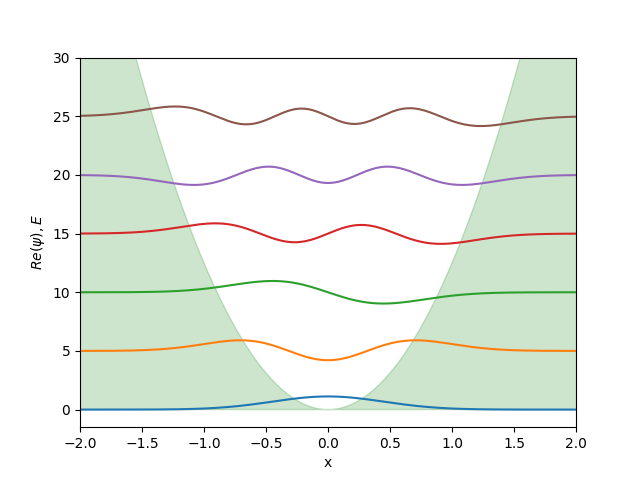

In [4]:
# Example 6: Simple Harmonic Oscillator Eigenstates

import matplotlib.pyplot as plt
import numpy as np

particle = Particle.from_initial(wave_packet, x_0=0, p_0=0, sigma_x=1)
particle.add_potential(simple_harmonic, omega=5.0)
particle.find_eigenstates(count=6)

fig = plt.figure("Simple Harmonic Oscillator Eigenstates")
ax = fig.add_subplot()
for n, psi_y in enumerate(particle.eigenstates):
    ax.plot(particle.psi.x, np.real(psi_y) + 5*n)
ax.fill_between(particle.psi.x, 0, particle.potential(), color='green', alpha=0.2)
ax.set_xlabel("x")
ax.set_ylabel("$\psi, E$")
ax.set_xlim([-2, 2])
ax.set_ylim([-1.5, 30])
plt.show()

In [ ]:
# Example 7: Periodic Square Wells

### Todo:
- stability & conservation
- boundary conditions (transparent, periodic)
- more potentials, more initial conditions, ...